In [1]:
# 處理 array
import numpy as np

# 產生隨機 list，用於隨機產生出一組合法解
import random

# data visualisation and manipulation
# 畫收斂圖
import matplotlib.pyplot as plt

In [2]:
# STEP 1 Initialization:
# 隨機產生出一組合法解 (至多2的100次方種可能解)

def ramdomSolution():
    # 隨機生成 100 bits 0/1 長度
    rand_sol = [ random.randint(0,1) for _ in range(n)]
    # 解值
    rand_val = Evaluation(rand_sol)
            
    return rand_sol, rand_val
# n=10
# ramdomSolution()

In [3]:
# STEP 2 Transition: 產生一個或多個解 隨機 移動
# 找鄰近解
# 採隨機移動 將任一位置 0換成 1 1換成 0 

def Transition(sol):
    
    neightbor_sol = sol.copy()

    # 採隨機移動 (2)隨機找其中一個 bit 0換成 1 1換成 0       
    i = random.randint(0,n-1)

    # 多一個 1 
    if(neightbor_sol[i] == 0):

        neightbor_sol[i] = 1

    # 少一個 1 
    else: 
        neightbor_sol[i] = 0
        
    # 鄰近解存在 tabu_list 中 --> 重找鄰近解
    if(not checkNotInTabuList(neightbor_sol)):
        neightbor_sol = Transition(sol)
    
    return neightbor_sol
    
# n=4
# getNeighbor([0,1,1,0])


In [4]:
# STEP 3 Evaluation: 評估一個或多個解 適應值(Objective value)大小

def Evaluation(sol):
    val = sol.count(1)
    return val

In [5]:
# STEP 4 Determination: 將 STEP 3 評估出的適應值與先前的進行比較

def Determination(current_sol, current_val, new_sol, new_val):
    # 新解值較好 --> 接受新解
    if(new_val > current_val):
        # print("接受新解: ", new_val)
        current_sol, current_val = new_sol, new_val
    return current_sol, current_val

In [6]:
def checkNotInTabuList(sol):
    
    # print("Check: tabu_list", tabu_list)
    
    # 存在 tabu_list 中 --> 產生新鄰近解
    if(sol in tabu_list):
        # print(sol," 存在 tabu_list 中 重找解")
        return False
    else:
        return True

In [7]:
def recordTabuList(sol):
    
    # tabu list 未滿 直接加進尾端
    if(len(tabu_list) < tabu_size):
        # print("tabu list 未滿 直接加進尾端: ", sol)
        tabu_list.append(sol)
        
    # tabu list 滿 刪第一個再加進尾端
    else:
        tabu_list.pop(0)
        tabu_list.append(sol)
        # print("tabu list 滿 刪第一個再加進尾端: ", sol)
        
    # print("record tabu_list", tabu_list)
        

In [8]:
def plotIteration(val_history, iteration):
    
    iterationTime = iteration

    plt.title('circle of average convergence')
    plt.plot(range(1, iterationTime + 1), val_history, label='Objective Value')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.grid()
    plt.show()

In [9]:
# STEP 0 Setting: 初始參數:

global n,iteration,run,tabu_list,tabu_size; 

# 100 bits
n = 100

# 迭代次數(Iteration)
iteration = 1000

# 平均迭代1次 run 次數
run = 51

# 禁忌搜尋列表 列表size設=7
tabu_list = []
tabu_size = 7


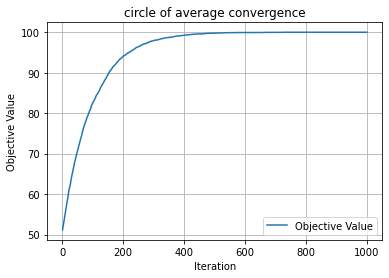

最佳解:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
最佳值:  100
最佳平均解值 100.0


In [10]:
# 採隨機移動 變數
# 採隨機移動 加總 51run 並計算平均
rand_avg_val = 0
rand_total_val = 0

# 紀錄每次採隨機移動迭代的值
rand_iteration_history = []

# 紀錄採隨機移動最佳解及最佳值
rand_best_sol = []
rand_best_val = 0

# 跑51次run平均1000次迭代
for i in range(run):
    
    # 新的一 run 先清空解暫存 及 tabu list
    temp_history = []
    tabu_list = []
    
    # STEP 1 Initial:
    # 隨機產生出一組合法解 
    rand_current_sol, rand_currrent_val = ramdomSolution()
    # 初始解存入 tabu list 中
    tabu_list.append(rand_current_sol)
    # print("初始解: ", rand_current_sol)
    # print("初始解值: ", rand_currrent_val)

    # 迭代 1000 次停止
    for k in range(iteration):

        # print("\nNO.",k," iteration")
        
        # 尚未找到最佳解(全1)
        if(rand_currrent_val < n):
            # 找鄰近解
            neightbor_sol = Transition(rand_current_sol)
            # 存入 tabu_list 中
            recordTabuList(neightbor_sol)
            # 計算鄰近解的 Objective value
            neightbor_val = Evaluation(neightbor_sol)

            # print("新解: ", neightbor_sol)
            # print("新解值: ", neightbor_val)
        
        rand_current_sol, rand_currrent_val = Determination(rand_current_sol, rand_currrent_val, neightbor_sol, neightbor_val)
        
        # 紀錄採隨機移動每次的值
        temp_history.append(rand_currrent_val)
        # 紀錄採隨機移動最佳解及最佳值
        if(rand_currrent_val > rand_best_val):
            rand_best_val = rand_currrent_val
            rand_best_sol = rand_current_sol
        
    # 紀錄採隨機移動每次迭代的值
    rand_iteration_history.append(temp_history)

# list 轉 np array 方便平均計算
rand_val_history = np.array(rand_iteration_history)

# 加總每一行
rand_total_val = rand_val_history.sum(axis=0)
# 跑 51次平均值
rand_avg_val = rand_total_val / run

# 畫採隨機移動的平均收斂圖
plotIteration(rand_avg_val, iteration)
print("最佳解: ", rand_best_sol)
print("最佳值: " ,rand_best_val)
print("最佳平均解值",max(rand_avg_val)) 
    
